In [115]:
# %%capture
# !pip install -U pandasql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import os.path
import getpass
import platform

#import xlrd


# Getting the user name for creating the directory

In [116]:
username = getpass.getuser()

print("Username: ", username)

Username:  marcovinciguerra


# Choosing the directory for the graphs

In [117]:
pathPart1 = "/Users/"
pathPart2 = "/Github/SCGProject/Datasets"
complePath = pathPart1+username+pathPart2



if platform.system() == "Darwin":
    print("The OS is MACOS")
    print("Complete path: ", complePath)
    dload = os.chdir(complePath)

elif platform.system() == "Linux":
    print("The OS is Linux")
    print("Complete path: ", complePath)
    dload = os.chdir(complePath)

else: 
    print("The OS is Windows")

    pathwin = "C:\SCGProject\CorrectedDatasets"
    print("Complete path: ", pathwin)
    dload = os.chdir(pathwin)


The OS is MACOS
Complete path:  /Users/marcovinciguerra/Github/SCGProject/Datasets


# Clienti

In [118]:
dfClienti = pd.read_csv('CorrectedDatasets/dfClienti.csv')

dfClienti.head()

,Unnamed: 0,Nr.,Cod. condizioni pagam.,Fatt. cumulative,Valuta
0,0,C00001,101,False,1
1,1,C00003,102,False,2
2,2,C00004,102,False,3
3,3,C00005,112,False,1
4,4,C00006,101,False,2


In [119]:
#1: Euro
indice1 = dfClienti.loc[dfClienti.Valuta == 1, :]

indice1.insert(loc=4, column='Valuta',
               value='Euro', allow_duplicates=True)

#2: Dollaro
indice2 = dfClienti.loc[dfClienti.Valuta == 2, :]

indice2.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)


#3: Yen
indice3 = dfClienti.loc[dfClienti.Valuta == 3, :]

indice3.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)

#Unione delle sottotabelle
union = pd.concat([indice1, indice2, indice3])

union.head()

,Unnamed: 0,Nr.,Cod. condizioni pagam.,Fatt. cumulative,Valuta,Valuta
0,0,C00001,101,False,Euro,1
3,3,C00005,112,False,Euro,1
6,6,C00008,101,False,Euro,1
9,9,C00011,101,False,Euro,1
12,12,C00017,101,False,Euro,1


# Consumi

In [120]:
dfConsumi = pd.read_csv('CorrectedDatasets/dfConsumi.csv')

dfConsumi.head()

,Unnamed: 0,NrMovimento,Budget/cons,CodiceMP,NrArticolo,NrDocumento,QuantityMPImpiegata,ImportoCostoTOTALE
0,0,21684,BUDGET,ART0001929,ART0000788,ODP16-16812,1.0,126.01
1,1,21685,BUDGET,ART0001820,ART0000788,ODP16-16812,1.0,52.71
2,2,21686,BUDGET,ART0005137,ART0000788,ODP16-16812,1.0,0.00
3,3,21687,BUDGET,ART0005138,ART0000788,ODP16-16812,1.0,0.00
4,4,21688,BUDGET,ART0005139,ART0000788,ODP16-16812,1.0,0.32


# Costo orario risorse - budget

In [121]:
dfCostoOrario = pd.read_csv(
    'CorrectedDatasets/dfImpiegoRisorse.csv')


dfCostoOrario.head()

,Unnamed: 0,NrArticolo,budgetConsuntivo,NrOrdineProduzione,Descrizione,NrAreaProduzione,Risorsa,TempoRisorsa,QuantitydiOutput
0,0,ART0000788,BUDGET,ODP16-16812,Montaggio,A40,RIS4,0.25,1.0
1,1,ART0000756,BUDGET,ODP16-15232,Montaggio,A40,RIS4,1.00,2.0
2,2,ART0000772,BUDGET,ODP16-15712,Montaggio,A40,RIS4,1.25,1.0
3,3,ART0000762,BUDGET,ODP16-14704,Montaggio,A40,RIS4,3.00,10.0
4,4,ART0000762,BUDGET,ODP16-14704,Controllo qualità,CQ,RIS16,0.00,10.0


# Costo orario risorse - consuntivo

In [122]:
dfConsuntivo = pd.read_csv(
    'CorrectedDatasets/dfCostoOrario.csv')

dfConsuntivo.head()

,Unnamed: 0,Risorsa,AreaProduzione,CostoOrario
0,0,RIS1,A10,51.0
1,1,RIS1,A11,51.0
2,2,RIS1,A20,68.0
3,3,RIS1,A30,68.0
4,4,RIS1,A32,51.0


# Impiego orario risorse

In [123]:
dfImpiegoRisorse = pd.read_csv(
    'CorrectedDatasets/dfImpiegoRisorse.csv')

dfImpiegoRisorse.head()

,Unnamed: 0,NrArticolo,budgetConsuntivo,NrOrdineProduzione,Descrizione,NrAreaProduzione,Risorsa,TempoRisorsa,QuantitydiOutput
0,0,ART0000788,BUDGET,ODP16-16812,Montaggio,A40,RIS4,0.25,1.0
1,1,ART0000756,BUDGET,ODP16-15232,Montaggio,A40,RIS4,1.00,2.0
2,2,ART0000772,BUDGET,ODP16-15712,Montaggio,A40,RIS4,1.25,1.0
3,3,ART0000762,BUDGET,ODP16-14704,Montaggio,A40,RIS4,3.00,10.0
4,4,ART0000762,BUDGET,ODP16-14704,Controllo qualità,CQ,RIS16,0.00,10.0


# Tassi di cambio

In [124]:
dfCambio = pd.read_csv('CorrectedDatasets/dfCambio.csv')

dfCambio.head()

,Unnamed: 0,CodiceValuta,Anno,TassoCambioMedio
0,0,1,BUDGET,1
1,1,2,BUDGET,"1,0541"
2,2,3,BUDGET,123.4
3,3,1,CONSUNTIVO,1
4,4,2,CONSUNTIVO,"1,1993"


# Vendite

In [125]:
dfVendite = pd.read_csv('CorrectedDatasets/dfVendite.csv')


dfVendite.head()


,Unnamed: 0,NrMovimento,budget/cons,NrArticolo,NrOrigine,Quantity,ImportoVenditaValutaLocaleTOTALEVENDITA
0,0,21621,BUDGET,ART0001433,C00140,4,18.80
1,1,21629,BUDGET,ART0001610,C00140,12,145.28
2,2,21631,BUDGET,ART0003269,C00140,24,933.99
3,3,21633,BUDGET,ART0002249,C00140,1,36.33
4,4,21634,BUDGET,ART0002370,C00140,1,65.72


# Plot and saving the graphs

# New directory

In [126]:
username = getpass.getuser()

pathPart1 = "/Users/"
pathPart2New = "/Github/SCGProject/Datasets/Graphs"
complePath = pathPart1+username+pathPart2New

print("Username: ", username)

if platform.system() == "Darwin":    
    print("The OS is MACOS")
    print("Complete path: ", complePath)
    dload = os.chdir(complePath)

elif platform.system() == "Linux":
    print("The OS is Linux")
    print("Complete path: ", complePath)

    dload = os.chdir(complePath)
else:
    print("The OS is Windows")
    print("Complete path: ", pathwin)
    pathwin = "C:\SCGProject\Datasets\Graphs"
    dload = os.chdir(pathwin)


Username:  marcovinciguerra
The OS is MACOS
Complete path:  /Users/marcovinciguerra/Github/SCGProject/Datasets/Graphs


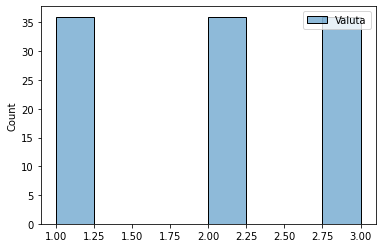

In [127]:
sns.histplot(union.Valuta)
plt.savefig('Valuta.jpeg')

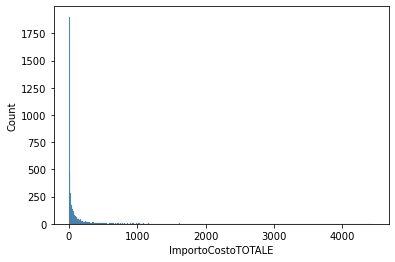

In [128]:
sns.histplot(dfConsumi.ImportoCostoTOTALE)
plt.savefig('ConsumiCostoTotale.jpeg')


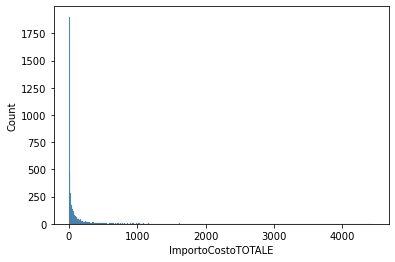

In [129]:
sns.histplot(dfConsumi.ImportoCostoTOTALE)
plt.savefig('ConsumiCostoTotale.jpeg')


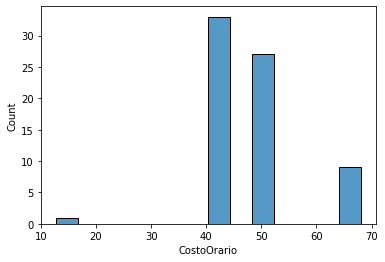

In [130]:
#Istogramma del costo orario
sns.histplot(dfConsuntivo.CostoOrario)
plt.savefig('CostoOrario.jpeg')


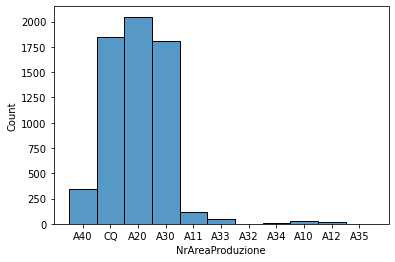

In [131]:
#Istogramma dell'area di produzione
sns.histplot(dfCostoOrario.NrAreaProduzione)
plt.savefig('CostoOrarioAreaProduzione.jpeg')


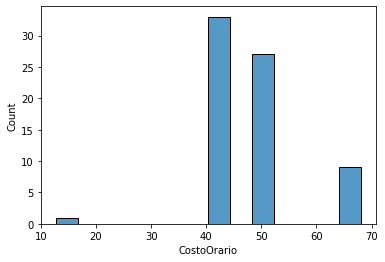

In [132]:
sns.histplot(dfConsuntivo.CostoOrario)
plt.savefig('ConsuntivoCostoOrario.jpeg')


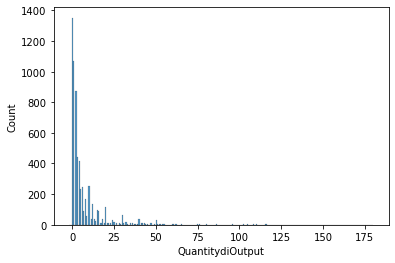

In [133]:
sns.histplot(dfImpiegoRisorse.QuantitydiOutput)
plt.savefig('ImpiegoRisorseOutput.jpeg')


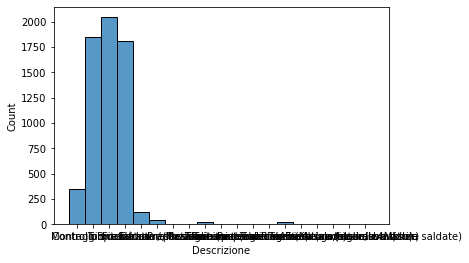

In [134]:
sns.histplot(dfImpiegoRisorse.Descrizione)
plt.savefig('ImpiegoRisorseDescrizione.jpeg')


<AxesSubplot:xlabel='TempoRisorsa', ylabel='Count'>

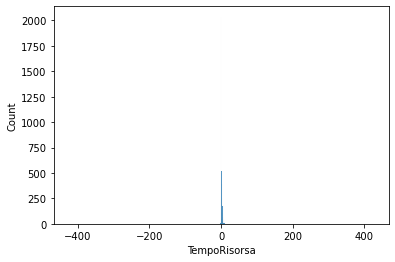

In [135]:
sns.histplot(dfImpiegoRisorse.TempoRisorsa)


<AxesSubplot:xlabel='TassoCambioMedio', ylabel='Count'>

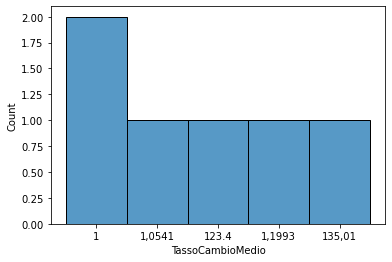

In [136]:
sns.histplot(dfCambio.TassoCambioMedio)


<AxesSubplot:xlabel='ImportoVenditaValutaLocaleTOTALEVENDITA', ylabel='Count'>

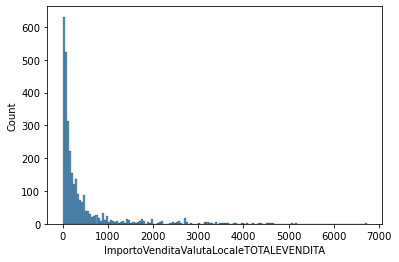

In [138]:
sns.histplot(dfVendite.ImportoVenditaValutaLocaleTOTALEVENDITA)
